# Laboratorio 1: Exploración y Visualización de Datos
Fecha: Marzo 2024

Integrantes: **Sebastian Acuña(S2) | Benjamín Torrealba(S2)** 


## Declaración de compromiso ético

Nosotros/as **Sebastian Acuña(S2) | Benjamín Torrealba(S2)** , declaramos que realizamos de manera grupal los pasos de la presente actividad. También declaramos no incurrir en copia, ni compartir nuestras respuestas con otras personas ni con otros grupos. Por lo que, ratificamos que las respuestas son de nuestra propia confección y reflejan nuestro propio conocimiento.

## Instrucciones

1.  Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2.  Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda. Puede ocupar Jupyter notebook en su computador o usar Google Colab como alternativa online.

3.  Para cada pregunta **incluya el código fuente que utilizó para llegar a su respuesta. Respuestas sin código no recibirán puntaje.**.

4.  El formato de entrega para esta actividad es un archivo **html**. **Genere un archivo HTML usando Jupyter** y súbalo a U-Cursos. Basta con que un/a integrante haga la entrega. Si ambos/as hacen una entrega en U-Cursos, se revisará cualquiera de éstas.

# Práctica

## Accidentes de tránsito

Para esta sección utilizaremos un dataset real de número de accidentes de tránsito por localidad, el cual puede ser encontrado en el siguiente link: http://datos.gob.cl/dataset/9348. Para cargar el dataset ejecute el siguiente código:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import pandas as pd
import requests

url = "https://users.dcc.uchile.cl/~hsarmien/mineria/datasets/accidentes_2010_2011.txt"
response = requests.get(url)
with open("accidentes_2010_2011.txt", "wb") as f:
    f.write(response.content)

tipos = pd.read_csv("accidentes_2010_2011.txt", sep=" ")
tipos.head()


,Muestra,Descripcion,Anio,TipoAccidente,Cantidad
1,Nacional,Nacional,2010,Atropello,8247
2,Nacional,Nacional,2011,Atropello,8339
3,Regional,XV Región Arica y Parinacota,2010,Atropello,115
4,Regional,XV Región Arica y Parinacota,2011,Atropello,159
5,Comunal,ARICA,2010,Atropello,115


Explore el set de datos para responder las siguientes preguntas:

1. ¿Cuáles son las dimensiones del dataset (filas, columnas)? (Recuerde adjuntar código).

In [7]:
tipos.shape

(4296, 5)

El dataset tipos contiene 4296 filas y 5 columnas

2. ¿Qué describe cada línea del dataset? (ejemplifique tomando el dato de la fila 235, extienda la descripción)

In [13]:
tipos['Muestra'].value_counts()

Muestra
Comunal     4104
Regional     180
Nacional      12
Name: count, dtype: int64

In [16]:
tipos['Descripcion'].value_counts()

Descripcion
Nacional                   12
SAAVEDRA                   12
LANCO                      12
CORRAL                     12
VALDIVIA                   12
                           ..
NANCAGUA                   12
LOLOL                      12
PENAFLOR                   12
VIII Región del Bio-Bio     6
VII Región del Bio-Bio      6
Name: count, Length: 359, dtype: int64

In [14]:
tipos['TipoAccidente'].value_counts()

TipoAccidente
Atropello    716
Caida        716
Colision     716
Choque       716
Volcadura    716
Otros        716
Name: count, dtype: int64

In [17]:
tipos.iloc[234]

Muestra            Comunal
Descripcion       PALMILLA
Anio                  2010
TipoAccidente    Atropello
Cantidad                 4
Name: 235, dtype: object

El dataset corresponde a información de accidentes de transito en distintas localidades entre los años 2010 y 2011 y segmentados por tipo de accidente. En este caso el dato nos indica que en el año 2010 en la comuna de 'PALMILLA' hubieron 4 accidentes de tipo 'Atropello.'

3. ¿Cuántos años diferentes abarca la información del dataset? Entregue un array con los años.


In [76]:
anios_info = tipos['Anio'].value_counts().index.to_list()
anios_info

[2010, 2011]

En el dataset contamos solamente con información correspondiente a los años 2010 y 2011, como se puede observar de la celda de arriba

4. Filtre los datos para incluir sólo los accidentes ocurridos el año 2011 a nivel Regional. Luego, genere un gráfico de barras que muestre la cantidad de accidentes en cada Región. Comente sus principales observaciones y si considera que es razonable usar el conteo de frecuencias para determinar las regiones que tuvieron más accidentes.

In [60]:
tipos_2011_regional = tipos[(tipos['Anio'] == 2011) & (tipos['Muestra'] == 'Regional')]
tipos_2011_regional

,Muestra,Descripcion,Anio,TipoAccidente,Cantidad
4,Regional,XV Región Arica y Parinacota,2011,Atropello,159
14,Regional,I Región de Tarapacá,2011,Atropello,202
30,Regional,II Región de Antofagasta,2011,Atropello,280
50,Regional,III Región de Atacama,2011,Atropello,113
70,Regional,IV Región de Coquimbo,2011,Atropello,228
...,...,...,...,...,...
4064,Regional,XIV Región de Los Ríos,2011,Otros,2
4090,Regional,X Región de Los Lagos,2011,Otros,48
4152,Regional,XI Región de Aysén,2011,Otros,1
4172,Regional,XII Región de Magallanes,2011,Otros,40


Text(0.5, 1.0, 'Cantidad de accidentes por region en 2011')

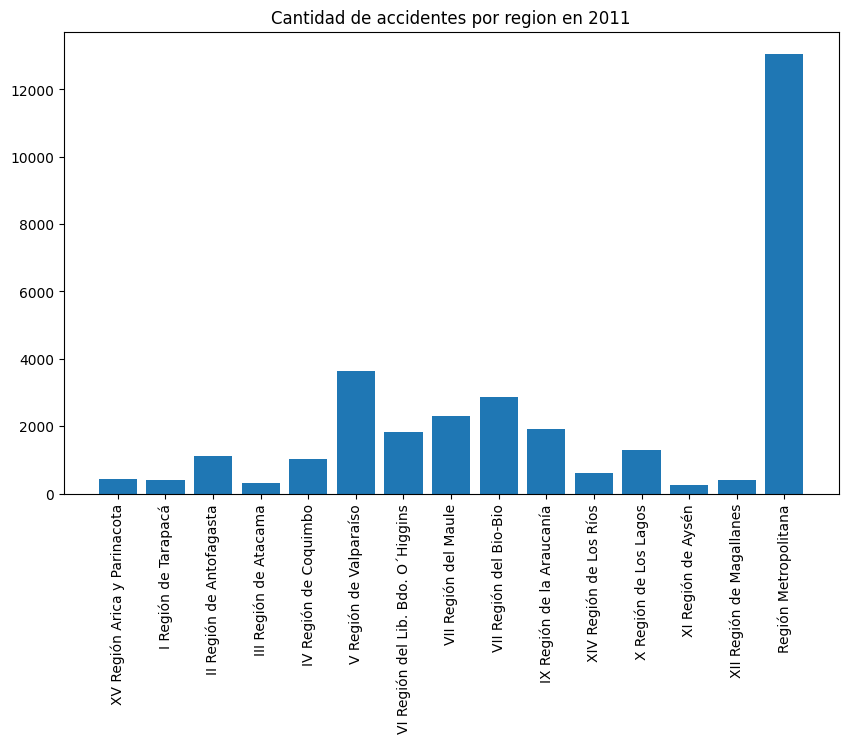

In [61]:
plt.figure(figsize=(10, 6))
plt.bar(tipos_2011_regional['Descripcion'], tipos_2011_regional['Cantidad'])
plt.xticks(rotation=90)
plt.title('Cantidad de accidentes por region en 2011')


R: Se observa que las regiónes con mayor población tienen una mayor cantida de accidentes ['RM', 'Valpo', 'BioBio']. Si tiene sentido usar el conteo de frecuencias, sin embargo como se tienen distintos tipos de accidentes se deben agrupar todos para poder encontrar qué regiones poseen una cantidad mayor de accidentes. Usar el conteo de frecuencia es razonable, pero se debe considerar que las regiones tienen distinta cantidad de habitantes.

5. Filtre los datos para incluir sólo los accidentes ocurridos el año 2010 a nivel regional. Genere un boxplot donde se indique la cantidad de accidentes categorizado por tipo de accidente. ¿Cuáles son sus principales observaciones?

In [62]:
tipos_2010_regional = tipos[(tipos['Anio'] == 2011) & (tipos['Muestra'] == 'Regional')]
tipos_2010_regional

,Muestra,Descripcion,Anio,TipoAccidente,Cantidad
4,Regional,XV Región Arica y Parinacota,2011,Atropello,159
14,Regional,I Región de Tarapacá,2011,Atropello,202
30,Regional,II Región de Antofagasta,2011,Atropello,280
50,Regional,III Región de Atacama,2011,Atropello,113
70,Regional,IV Región de Coquimbo,2011,Atropello,228
...,...,...,...,...,...
4064,Regional,XIV Región de Los Ríos,2011,Otros,2
4090,Regional,X Región de Los Lagos,2011,Otros,48
4152,Regional,XI Región de Aysén,2011,Otros,1
4172,Regional,XII Región de Magallanes,2011,Otros,40


Text(0.5, 1.0, 'Cantidad de accidentes por region en 2011')

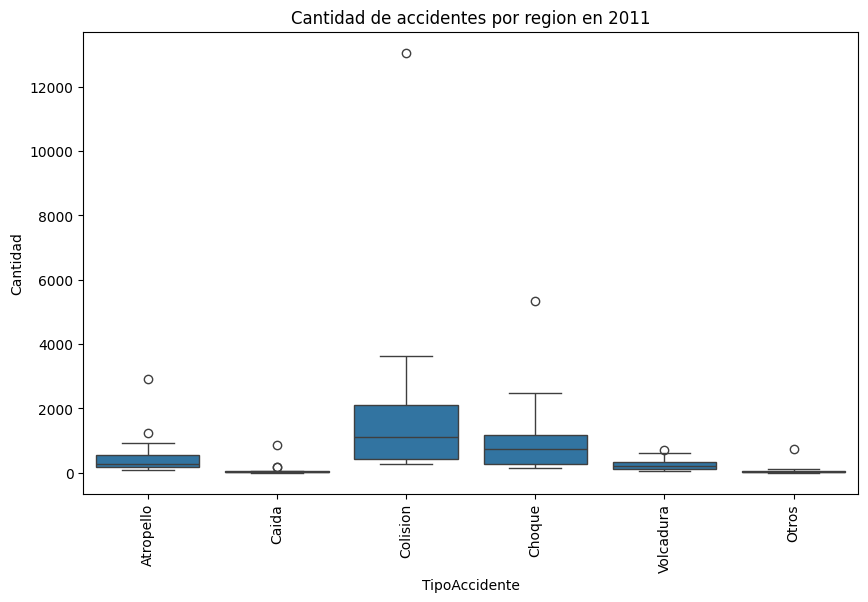

In [63]:
import seaborn as sns

# boxplot   
plt.figure(figsize=(10, 6))
sns.boxplot(x='TipoAccidente', y='Cantidad', data=tipos_2011_regional)
plt.xticks(rotation=90)
plt.title('Cantidad de accidentes por region en 2011')



En primer lugar, se puede observar que las colisiones y los choques son los dos principales tipos de accidentes de tránsito, mientras que las caídas son bastante infrecuentes.

Además, resulta interesante notar que brazo superior es considerablemente más largo que el inferior en cada una de las cajas, llegando incluso a superar el tamaño de los rectángulos. Esto revela que en general los datos regionales se encuentran similarmente distribuídos, a excepción de la Región Metropolitana que presenta valores muy elevados (outlier) y por tanto resta simetría a la visualización. 

6. ¿Qué otra forma de explorar los datos podría agregar para el dataset de Accidentes de tránsito y qué información adicional aporta? Adjunte el código necesario.

Text(0.5, 1.0, 'Cantidad de accidentes por region en 2011')

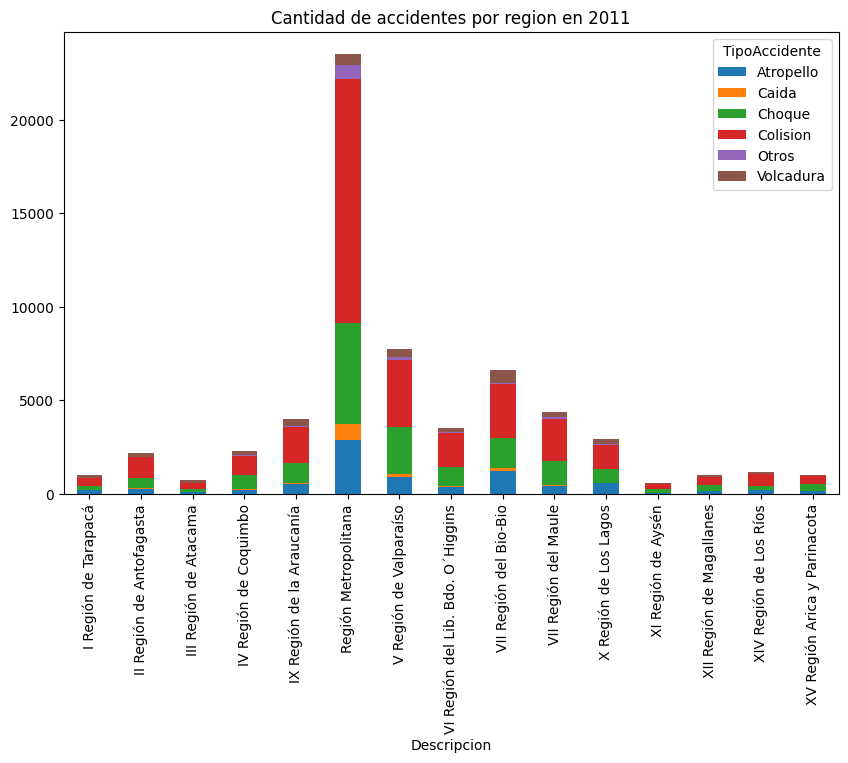

In [64]:
tipos_2011_regional.pivot(index='Descripcion', columns='TipoAccidente', values='Cantidad').plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xticks(rotation=90)
plt.title('Cantidad de accidentes por region en 2011')



Este gráfico nos permite además de visualizar la cantidad de accidentes por región en el año 2011, identificar el tipo de accidente que representa. De esto podemos observar que para las las regiones con mayor cantidad de accidentes, tienen distribuciones similares por tipo de accidentes. 

## Diabetes
Considere el set de datos de pacientes para la predicción de diabetes con las siguientes columnas:

- gender: género del paciente
- age: edad del paciente
- hypertension: indica si el paciente tiene o no hipertensión
- heart_disease: indica si el paciente tiene o no enfermedad cardiaca
- smoking_history: indica si el paciente es o fue fumador
- bmi: indice de masa corporal del paciente
- HbA1c_level: Hemoglobina HbA1c del paciente
- blood_glucose_level: Nivel de glucosa en sangre del paciente
- diabetes: si el paciente tiene o no diabetes

In [51]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


7. Para explorar el dataset, realice un análisis de frecuencias de los atributos categóricos (categorías binarias y multiclase).



In [72]:
cat_col = ['gender','hypertension','heart_disease','diabetes']

# values count with percentage
for col in cat_col:
    print(f'frecuencias absolutas, columna {col}')
    print(diabetes[col].value_counts())
    print('\n')
    print(f'frecuencias normalizadas columna {col}')
    print(diabetes[col].value_counts(normalize=True))
    print('\n')



frecuencias absolutas, columna gender
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


frecuencias normalizadas columna gender
gender
Female    0.58552
Male      0.41430
Other     0.00018
Name: proportion, dtype: float64


frecuencias absolutas, columna hypertension
hypertension
0    92515
1     7485
Name: count, dtype: int64


frecuencias normalizadas columna hypertension
hypertension
0    0.92515
1    0.07485
Name: proportion, dtype: float64


frecuencias absolutas, columna heart_disease
heart_disease
0    96058
1     3942
Name: count, dtype: int64


frecuencias normalizadas columna heart_disease
heart_disease
0    0.96058
1    0.03942
Name: proportion, dtype: float64


frecuencias absolutas, columna diabetes
diabetes
0    91500
1     8500
Name: count, dtype: int64


frecuencias normalizadas columna diabetes
diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64




Observamos que para la categoría 'gender' tenemos 3 posibles valores ['Female', 'Male', 'Other'] siendo en su mayoría Female casi un 60% seguido de Male con un 41%. Con respecto a la variable hipertensión, notamos que el 92% de las muestras son pacientes sin hipertensión, con respecto a problemas cardiacos el 96% no posee problamas cardiacos y por último el 91,5% de las muestras no tienen diabetes.

8. Muestre estadísticas de resumen para las variables numéricas y comenten sus observaciones.

In [68]:
num_col = ['age','bmi','HbA1c_level', 'blood_glucose_level']
diabetes[num_col].describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507,138.058060
std,22.516840,6.636783,1.070672,40.708136
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


Se observan distribuciones muy distintas entre las variables. Tienen medias y desviaciones muy dispares, lo cual tiene sentido ya que están en escalas distintas. Además observamos que las distribuciones no son identicas, esto se puede desprender de los percentiles (notando los aumentos entre los percentiles mostrados), esto da a entender que las distribuicones no son similares. Por último, con respecto a los outliers, se puede intuir que existen sin embargo esto es más directo identificarlo usando técnicas de visualización. (o también imprimiendo más percentiles)

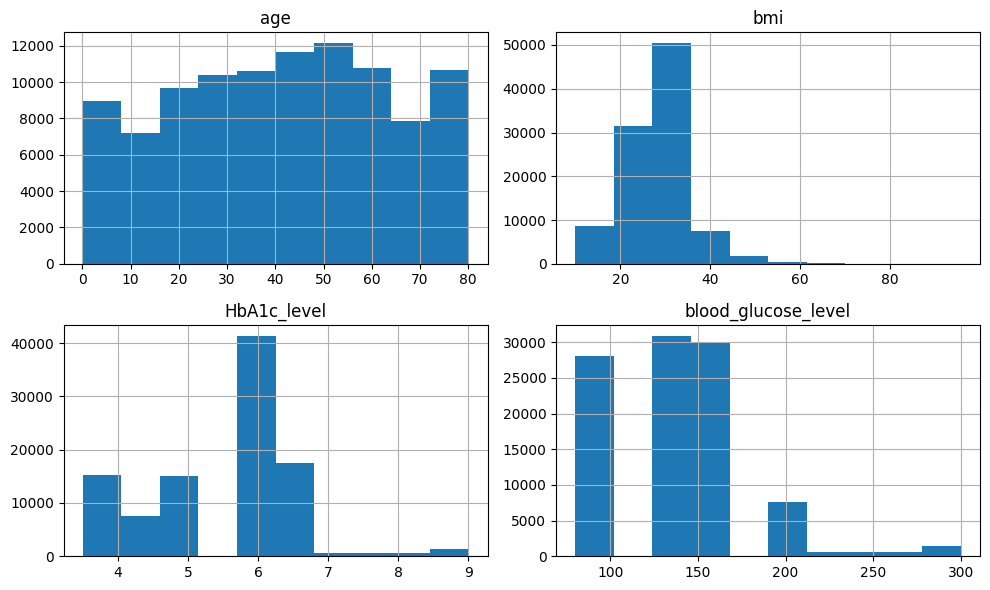

In [73]:
# graficamos histogramas
diabetes[num_col].hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

Y eso es todo por hoy :)


![image.png](attachment:image.png)